In [15]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 67

device = "cuda" if torch.cuda.is_available() else "cpu"

X_blob , y_blob = make_blobs(n_samples=1000,n_features=NUM_FEATURES,centers=NUM_CLASSES,cluster_std=1.5,random_state=RANDOM_SEED)
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_train , X_test , y_train , y_test = train_test_split(X_blob , y_blob , test_size = 0.20 , random_state = RANDOM_SEED)
X_train , X_test , y_train , y_test = X_train.to(device) , X_test.to(device) , y_train.to(device) , y_test.to(device)

In [16]:
class BlobModel(nn.Module):
    def __init__(self,input_features,output_features,hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_features)
        )

    def forward(self,x):
        return self.linear_layer_stack(x)

model = BlobModel(input_features=2,output_features=4,hidden_units=8).to(device)
model

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [17]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters() , lr=0.1)

In [18]:
epochs = 10000

for epoch in range(epochs):
    model.train()
    y_logits = model(X_train)
    y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)
    loss = loss_fn(y_logits , y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits,y_test)

    if epoch % 1000 == 0:
        print(f"Loss : {loss} | Test Loss : {test_loss}")

Loss : 1.237025499343872 | Test Loss : 1.0848388671875
Loss : 0.016367146745324135 | Test Loss : 0.01011150237172842
Loss : 0.014679030515253544 | Test Loss : 0.007464296650141478
Loss : 0.013709014281630516 | Test Loss : 0.006093599367886782
Loss : 0.013037622906267643 | Test Loss : 0.0051712761633098125
Loss : 0.012565833516418934 | Test Loss : 0.0045308917760849
Loss : 0.0122440280392766 | Test Loss : 0.0040674712508916855
Loss : 0.012030882760882378 | Test Loss : 0.0037396037951111794
Loss : 0.01189502514898777 | Test Loss : 0.0034931395202875137
Loss : 0.011810800060629845 | Test Loss : 0.0033109737560153008


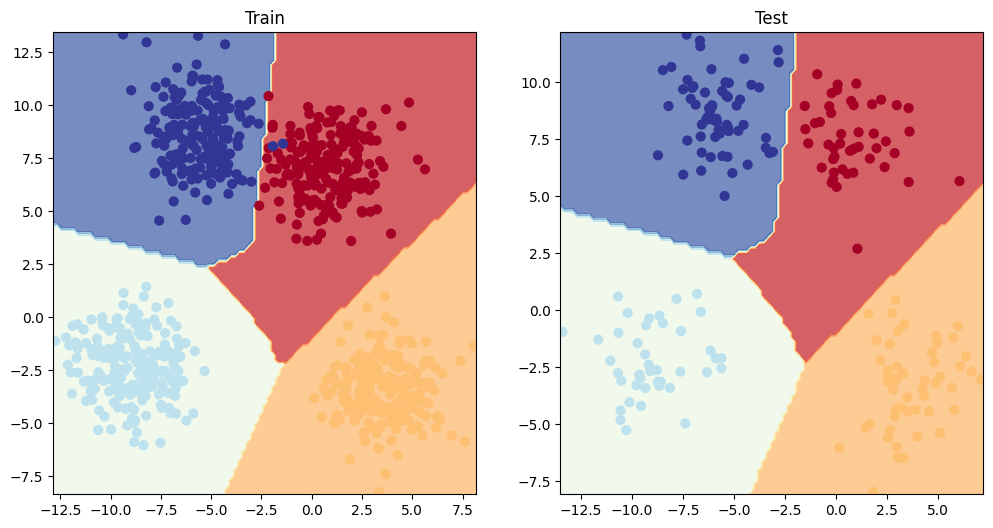

In [26]:
from helper_functions import plot_decision_boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,X_test,y_test)